<a href="https://colab.research.google.com/github/WARR0N/Federal-Reserve/blob/main/notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# ========================
# 📦 Setup & Installation
# ========================
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================
# 📈 Download S&P 500 Data
# ========================
sp500 = yf.download('^GSPC', start='2000-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
sp500 = sp500[['Close']].copy()
sp500.rename(columns={'Close': 'SP500_Close'}, inplace=True)
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.resample('ME').last()  # Resample to monthly end frequency

# ========================
# 📊 Load FRED Macro Data
# ========================
cpi = pd.read_csv('/content/CPIAUCSL.csv')
fedfunds = pd.read_csv('/content/FEDFUNDS.csv')
gs10 = pd.read_csv('/content/GS10.csv')
unrate = pd.read_csv('/content/UNRATE.csv')

# ========================
# 📉 Load US Recession Indicator from FRED
# ========================
usrec = pd.read_csv('/content/USREC.csv')  # Upload this file manually first
usrec.rename(columns={usrec.columns[0]: 'DATE'}, inplace=True)
usrec['DATE'] = pd.to_datetime(usrec['DATE'])
usrec.set_index('DATE', inplace=True)
usrec = usrec.resample('ME').last().dropna()  # Monthly frequency

# ========================
# 🧹 Clean & Preprocess Data
# ========================
# Renaming the first column to 'DATE' for consistency
for df in [cpi, fedfunds, gs10, unrate]:
    df.rename(columns={df.columns[0]: 'DATE'}, inplace=True)

# Preprocess function to handle date conversion and numeric values
def prep(df, col_name):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure 'DATE' is datetime
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')  # Convert specified column to numeric
    df.set_index('DATE', inplace=True)
    df = df.resample('ME').last()  # Resample by month-end frequency
    return df.dropna()  # Drop missing values

# Apply preprocessing to each macroeconomic dataset
cpi = prep(cpi, 'CPIAUCSL')
fedfunds = prep(fedfunds, 'FEDFUNDS')
gs10 = prep(gs10, 'GS10')
unrate = prep(unrate, 'UNRATE')

# ========================
# 🔗 Merge All Datasets
# ========================
merged_df = sp500.join([cpi, fedfunds, gs10, unrate, usrec], how='inner')
# ========================
# 📦 Setup & Installation
# ========================
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================
# 📈 Download S&P 500 Data
# ========================
sp500 = yf.download('^GSPC', start='2000-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
sp500 = sp500[['Close']].copy()
sp500.rename(columns={'Close': 'SP500_Close'}, inplace=True)
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.resample('ME').last()  # Resample to monthly end frequency

# ========================
# 📊 Load FRED Macro Data
# ========================
cpi = pd.read_csv('/content/CPIAUCSL.csv')
fedfunds = pd.read_csv('/content/FEDFUNDS.csv')
gs10 = pd.read_csv('/content/GS10.csv')
unrate = pd.read_csv('/content/UNRATE.csv')

# ========================
# 📉 Load US Recession Indicator from FRED
# ========================
usrec = pd.read_csv('/content/USREC.csv')  # Upload this file manually first
usrec.rename(columns={usrec.columns[0]: 'DATE'}, inplace=True)
usrec['DATE'] = pd.to_datetime(usrec['DATE'])
usrec.set_index('DATE', inplace=True)
usrec = usrec.resample('ME').last().dropna()  # Monthly frequency

# ========================
# 🧹 Clean & Preprocess Data
# ========================
# Renaming the first column to 'DATE' for consistency
for df in [cpi, fedfunds, gs10, unrate]:
    df.rename(columns={df.columns[0]: 'DATE'}, inplace=True)

# Preprocess function to handle date conversion and numeric values
def prep(df, col_name):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure 'DATE' is datetime
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')  # Convert specified column to numeric
    df.set_index('DATE', inplace=True)
    df = df.resample('ME').last()  # Resample by month-end frequency
    return df.dropna()  # Drop missing values

# Apply preprocessing to each macroeconomic dataset
cpi = prep(cpi, 'CPIAUCSL')
fedfunds = prep(fedfunds, 'FEDFUNDS')
gs10 = prep(gs10, 'GS10')
unrate = prep(unrate, 'UNRATE')

# ========================
# 🔗 Merge All Datasets
# ========================
merged_df = sp500.join([cpi, fedfunds, gs10, unrate, usrec], how='inner')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

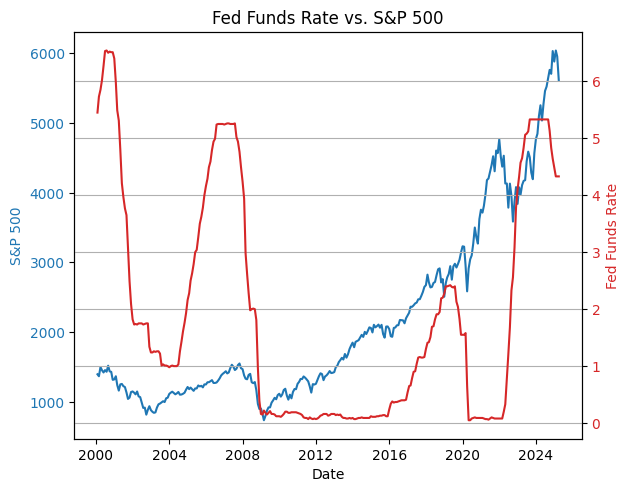

In [14]:
# Plot: Fed Funds Rate vs S&P 500
plt.figure(figsize=(12, 6))

# Create a twin axis to show both lines (Fed Funds Rate and S&P 500)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500', color='tab:blue')
ax1.plot(merged_df.index, merged_df[('SP500_Close', '^GSPC')], color='tab:blue', label='S&P 500')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel('Fed Funds Rate', color='tab:red')
ax2.plot(merged_df.index, merged_df['FEDFUNDS'], color='tab:red', label='Fed Funds Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Fed Funds Rate vs. S&P 500')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

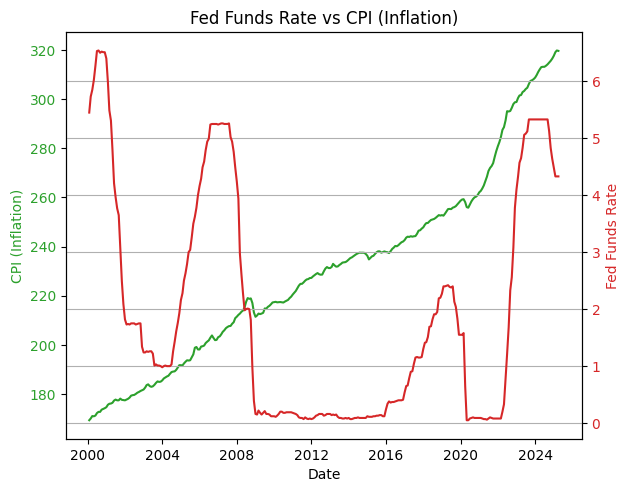

In [15]:
# Plot: Fed Funds Rate vs CPI (Inflation)
plt.figure(figsize=(12, 6))

# Create a twin axis to show both lines (Fed Funds Rate and CPI)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI (Inflation)', color='tab:green')
ax1.plot(merged_df.index, merged_df['CPIAUCSL'], color='tab:green', label='CPI (Inflation)')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel('Fed Funds Rate', color='tab:red')
ax2.plot(merged_df.index, merged_df['FEDFUNDS'], color='tab:red', label='Fed Funds Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Fed Funds Rate vs CPI (Inflation)')
plt.grid(True)
plt.show()

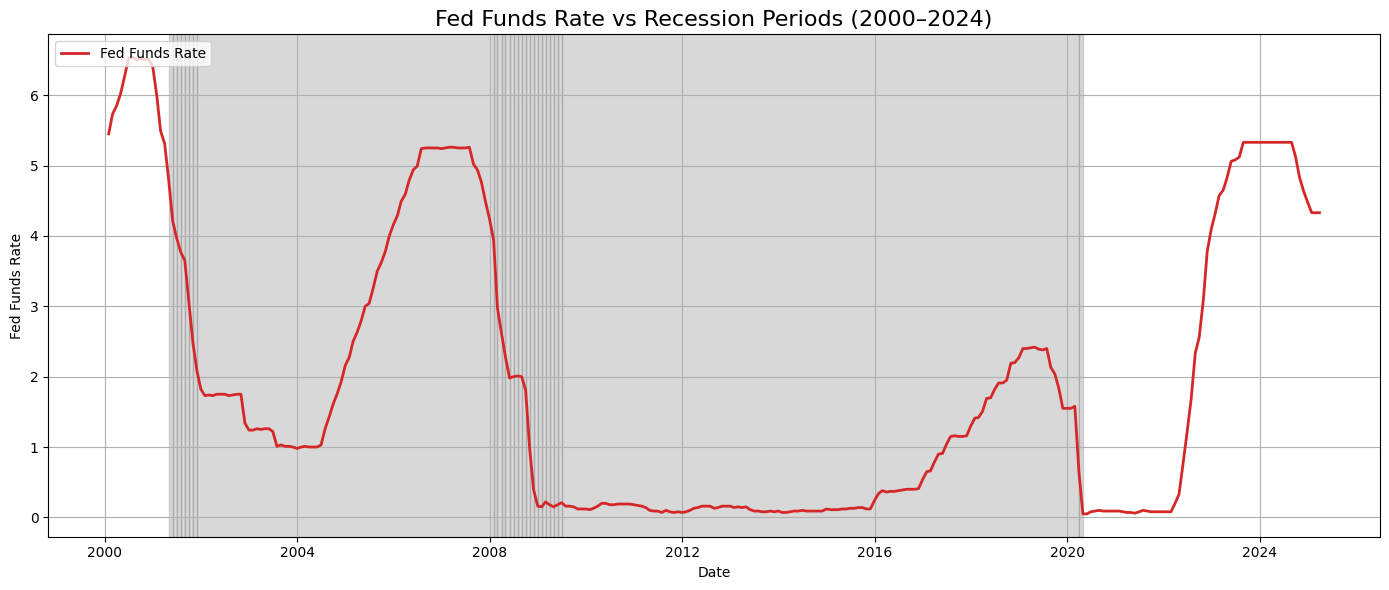

In [16]:
# ============================
# 📉 Fed Funds Rate vs Recession Periods
# ============================

plt.figure(figsize=(14, 6))

# Plot Fed Funds Rate
plt.plot(merged_df.index, merged_df['FEDFUNDS'], label='Fed Funds Rate', color='tab:red', linewidth=2)

# Shade recession periods where USREC == 1
recessions = merged_df[merged_df['USREC'] == 1]
for i in range(1, len(recessions)):
    start = recessions.index[i - 1]
    end = recessions.index[i]
    # Only shade if the dates are not the same (avoid single-point bands)
    if start != end:
        plt.axvspan(start, end, color='gray', alpha=0.3)

# Labels and formatting
plt.title('Fed Funds Rate vs Recession Periods (2000–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Fed Funds Rate')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


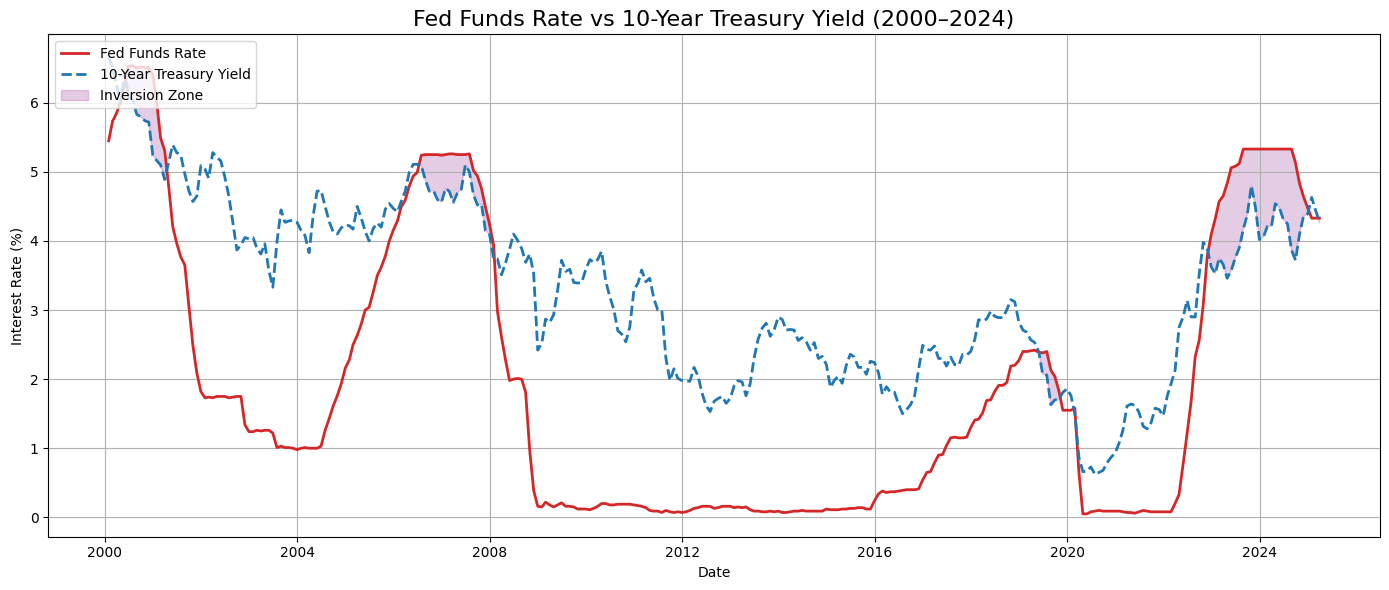

In [17]:
# ============================
# 💸 Fed Funds Rate vs. 10-Year Treasury Yield
# ============================

plt.figure(figsize=(14, 6))

# Plot Fed Funds Rate
plt.plot(merged_df.index, merged_df['FEDFUNDS'], label='Fed Funds Rate', color='tab:red', linewidth=2)

# Plot 10-Year Treasury Yield
plt.plot(merged_df.index, merged_df['GS10'], label='10-Year Treasury Yield', color='tab:blue', linestyle='--', linewidth=2)

# Highlight where Fed Funds > 10-Year Yield (inversion)
inversion = merged_df['FEDFUNDS'] > merged_df['GS10']
plt.fill_between(merged_df.index, merged_df['FEDFUNDS'], merged_df['GS10'], where=inversion,
                 interpolate=True, color='purple', alpha=0.2, label='Inversion Zone')

# Formatting
plt.title('Fed Funds Rate vs 10-Year Treasury Yield (2000–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


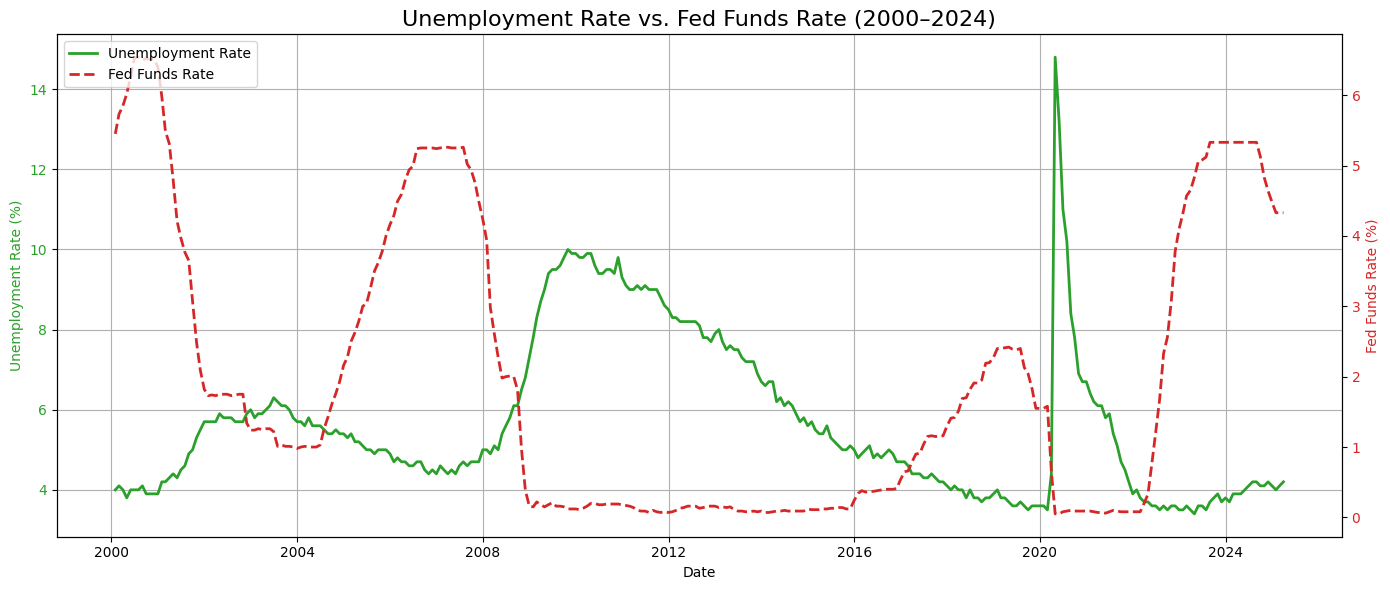

In [18]:
# ================================
# 📉 Unemployment Rate vs. Fed Funds Rate
# ================================

# Create figure and axis with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Unemployment Rate on the primary y-axis
ax1.plot(merged_df.index, merged_df['UNRATE'], label='Unemployment Rate', color='tab:green', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for Fed Funds Rate
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['FEDFUNDS'], label='Fed Funds Rate', color='tab:red', linestyle='--', linewidth=2)
ax2.set_ylabel('Fed Funds Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and grid
plt.title('Unemployment Rate vs. Fed Funds Rate (2000–2024)', fontsize=16)
ax1.grid(True)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Layout
plt.tight_layout()
plt.show()


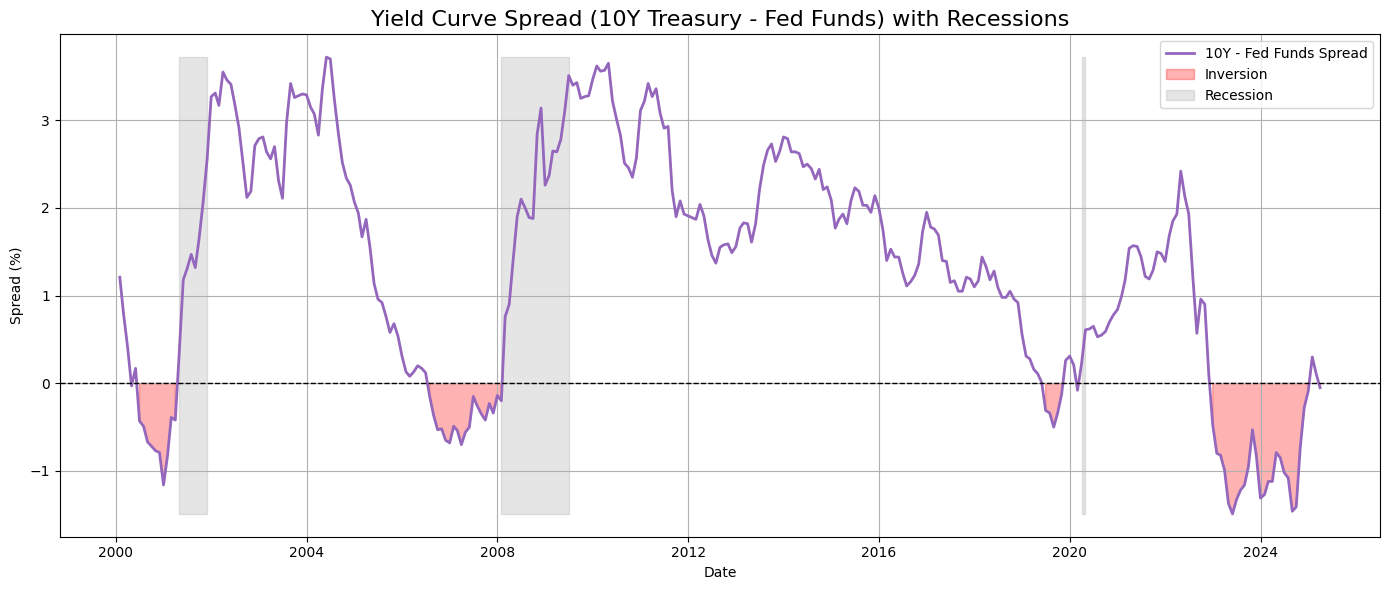

In [19]:
# ================================================
# 🔀 Yield Curve Spread: 10-Year Treasury - Fed Funds Rate
# ================================================

# Calculate the yield curve spread
merged_df['Yield_Spread'] = merged_df['GS10'] - merged_df['FEDFUNDS']

# Plot the yield spread
plt.figure(figsize=(14, 6))
plt.plot(merged_df.index, merged_df['Yield_Spread'], label='10Y - Fed Funds Spread', color='tab:purple', linewidth=2)

# Highlight inversion periods (spread < 0)
plt.fill_between(merged_df.index, merged_df['Yield_Spread'], 0,
                 where=merged_df['Yield_Spread'] < 0, color='red', alpha=0.3, label='Inversion')

# Highlight recession periods
recession_periods = merged_df['USREC'] == 1
plt.fill_between(merged_df.index, merged_df['Yield_Spread'].min(), merged_df['Yield_Spread'].max(),
                 where=recession_periods, color='gray', alpha=0.2, label='Recession')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Yield Curve Spread (10Y Treasury - Fed Funds) with Recessions', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


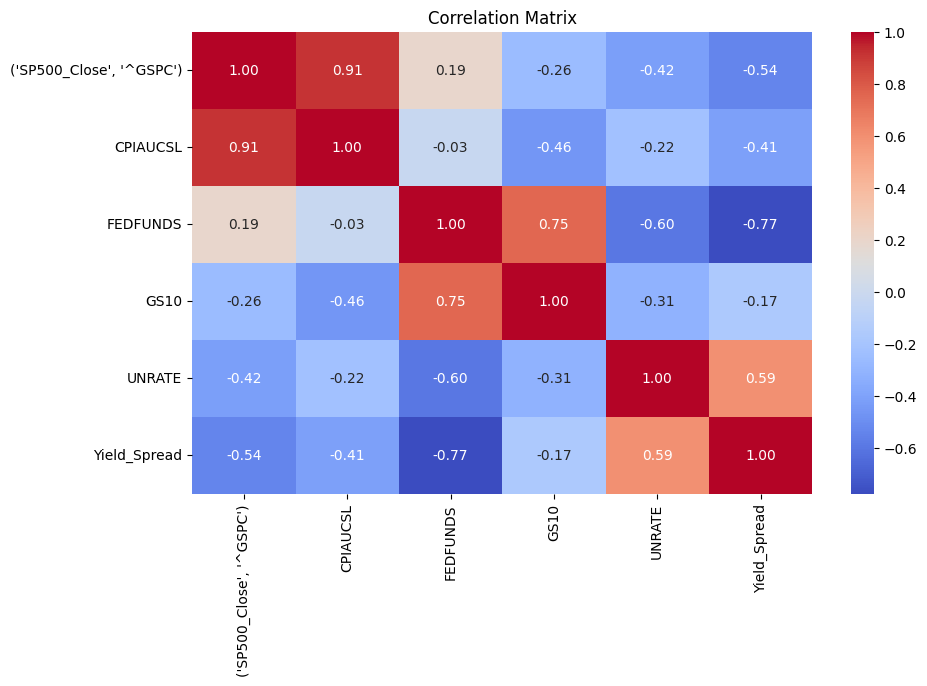

In [20]:
# Remove 'USREC' from the merged dataframe before calculating the correlation matrix
merged_df_no_usrec = merged_df.drop(columns=['USREC'])

# Calculate the correlation matrix without 'USREC'
correlation_matrix = merged_df_no_usrec.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()